# LCA algebraic module HandBook

## Initialization

In [1]:
import brightway2 as bw
import os 
import lca_algebraic as agb

from sympy import init_printing
import bw2io
from dotenv import load_dotenv

# Pretty print for Sympy
init_printing()

# handbook https://github.com/oie-mines-paristech/lca_algebraic/blob/main/notebooks/handbook.ipynb
# Computational example https://github.com/oie-mines-paristech/lca_algebraic/blob/main/notebooks/example-notebook.ipynb

In [2]:
NAME_PROJECT="tuto_bw_lca_algebraic"
NAME_USER_DB='ecoinvent_391' # user database name

bw.projects.set_current(NAME_PROJECT) #Open a brightway project associated with the project name chosen
bw.projects.current
agb.resetDb(NAME_USER_DB) # Create and reset the user (foreground) database
agb.resetParams() # Reset the definition of all parameters 

[WARNING] Db ecoinvent_391 was here. Reseting it


## Loading background ecoinvent database

In [5]:
if 'ecoinvent_v3.9.1_cutoff_ecoSpold02' in bw.databases:
    print("Database has already been imported.")
else:
    fpei39cut = r"C:\Users\lebrunjus\Desktop\ecoinvent_databases\ecoinvent_v3.9.1_cutoff_ecoSpold02\datasets"
    #r"C:\Users\lebrunjus\Desktop\LCA SST Workshop\Brightway\ecoinvent_v3.9.1_cutoff_ecoSpold02\datasets"
    ei39cut = bw.SingleOutputEcospold2Importer(fpei39cut, 'ecoinvent_v3.9.1_cutoff_ecoSpold02')
    ei39cut
    ei39cut.apply_strategies()
    ei39cut.statistics()
    ei39cut.write_database()

    bw.bw2setup() #Importing elementary flows, LCIA methods and some other data

FOREGROUND_DB = 'MyForeground' # separate DB for defining our foreground model / activities
agb.resetDb(FOREGROUND_DB) # cleanup the whole foreground model each time; Any persistent state is prone to errors.

# Overview of the databases
agb.list_databases()
#bw.databases # Print the databases that have been set up with brightway function

# delete a USER_DB
# del bw.databases["name-db-to-delete"]

Extracting ecospold2 files:
0% [##############################] 100% | ETA: 00:00:00 | Item ID: fffede58-fed2-5
Total time elapsed: 00:18:34


Title: Extracting ecospold2 files:
  Started: 02/28/2025 16:01:33
  Finished: 02/28/2025 16:20:07
  Total time elapsed: 00:18:34
  CPU %: 13.20
  Memory %: 21.00
Extracted 21238 datasets in 1117.65 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows


D:\Users\Justine\Anaconda\envs\lca_algebraic_CGM\lib\site-packages\bw2io\strategies\ecospold2.py:1070: UserWarning: Skipping migration 'fix-ecoinvent-flows-pre-35' because it isn't installed
  warnings.warn(


Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: convert_activity_parameters_to_list
Applying strategy: add_cpc_classification_from_single_reference_product
Applying strategy: delete_none_synonyms
Applying strategy: update_social_flows_in_older_consequential
Applying strategy: set_lognormal_loc_value
Applied 22 strategies in 15.15 seconds
21238 datasets
674593 exchanges
407351 unlinked exchanges
  Type biosphere: 996 unique unlinked exchanges


Writing activities to SQLite3 database:


InvalidExchange: 

## Select LCIA methods

**bw.methods** is a brightway dictionnary that contains all LCIA methods and impacts categories that were imported when initialising the notebook.
Objects in **bw.methods** are triplet (LCIA method, endpoint category, midpoint category) that corresponds 
to impacts categories calculated with a given LCIA method.

In [6]:
print('Brightway LCIA methods and impact categories')
list(bw.methods) #See all triplets of bw.methods

########
# Search through the methods
# list_LCIA_methods = [m[0] for m in bw.methods] # See all the LCIA methods available in Brightway 2
# list_LCIA_methods = [m[0] for m in bw.methods if "ReCiPe" in str(m)] # See all the LCIA methods that were imported that contains ReCiPe in their name"
# list_LCIA_methods = [m[0] for m in bw.methods if not "no LT" in str(m) and not'obsolete' in str(m)] # See all the LCIA methods that were imported excluding the one containing keywords such as "no LT" or "obsolete"

# list_LCIA_methods = [*set(list_LCIA_methods)]
# list_LCIA_methods

Brightway LCIA methods and impact categories


In [7]:
# Pick the LCIA method 
LCIA_method = 'EF v3.0 no LT'

## Select impact categories

List all the impacts categories that can be calculated with the selected LCIA method 

In [8]:
list_impact_categories=agb.findMethods("",LCIA_method)
nb_impacts=len(list_impact_categories)

print(f"There are {nb_impacts} impacts categories calculated with the LCIA method : '{LCIA_method}' that are :")
list_impact_categories

There are 0 impacts categories calculated with the LCIA method : 'EF v3.0 no LT' that are :


**impact_categories** are triplet (LCIA method, endpoint category, midpoint category).

To do : update the name of the endpoint and midpoint category in the triplet and the name of impact_categories

In [59]:
climate = (LCIA_method, 'climate change no LT','global warming potential (GWP100) no LT')
resources = (LCIA_method, 'energy resources: non-renewable no LT','abiotic depletion potential (ADP): fossil fuels no LT')
soil = (LCIA_method, 'climate change: land use and land use change no LT','global warming potential (GWP100) no LT')    

# Find all impacts categories calculated with the LCIA method chosen that contain a keyword with agb.findMethods("keyword", LCIA methods)

Define a list of impacts categories chosen and print it

In [60]:
impacts = [climate, resources, soil]

nb_impacts = len(impacts)
print(f"We have selected {nb_impacts} impacts categories calculated with the LCIA method : '{LCIA_method}' that are :")
print(" ")
for m in impacts : print(m[1],">", m[-1])

We have selected 3 impacts categories calculated with the LCIA method : 'EF v3.0 no LT' that are :
 
climate change no LT > global warming potential (GWP100) no LT
energy resources: non-renewable no LT > abiotic depletion potential (ADP): fossil fuels no LT
climate change: land use and land use change no LT > global warming potential (GWP100) no LT


Test if the triplet you have just defined are methods in bw.methods.

If there is no error, it means it is ok. If there is an error, it means at least one of the impact categories is not correctly defined and does not correspond to an existing impact category. Check that there is no tipping error. 

In [61]:
bw.methods[climate]
bw.methods[resources]
bw.methods[soil]

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg CO2-Eq',
 'abbreviation': 'ef-v30-no-ltcg.e0b4c646ca9e0c4e30582c8baa6c7b25',
 'num_cfs': 16}

## Define parameters

**lca_algebraic parameters** have functionalities that helps manipulating parameters while doing LCA. For example, it helps calculating scenarios or conducting fast sensitivity analysis.

Define the parameters:
- you don't want to make vary as standard python variables (static variables)
- you wish to change as lca_algebraic parameters


### Static parameters

In [62]:
steel_density = 7850 # [kg/m3]

### lca_algebraic parameters

**lca_algebraic** can define 3 types of parameters :

- Float parameter, with `newFloatParam(...)`
- Bool parameter, with `newBoolParam(...)`
- "Exclusive choice", that corresponds to the definition of several boolean parameters with `newEnumParam(...)` > for example, for an electricity mix, we have to choose one mix among others

N.B.: When you define a lca_algebraic parameter, the name of the parameter has to be the same as the name of the variable.

In [63]:
" Examples of lca_algebraic parameters implementation "

### new Float Param
# Example : PV power installed in kWpeak 
power_capacity = agb.newFloatParam(
    name="power_capacity",                        # short name
    label="roof system",                # label
    description="installed peak power", # long description
    unit="kWp",                         # unit
    group="intallation",                # (optional) to class your parameters in group
    default=1500,                       # default value
    min=3,                              # min value
    max=300,                            # max value 
    distrib=agb.DistributionType.TRIANGLE)  # (optional) statistic distribution of the parameter

# Note: statistic distribution of the parameter can be : agb.DistributionType.NORMAL or .TRIANGLE or .LINEAR or.LOGNORMAL
# if "distrib" is empty, a uniform distribution will be chosen by default  
# ignore the warning

### new Bool param
# Example: Bool parameter that defines the installation type 
# 1 =  on roof 
# 0 = on soil 
on_roof=agb.newBoolParam(
    name="on_roof",                     # short name
    label="mounting system",            # long label
    description="mounting system roof (on_roof=1) or ground mounting system (on_roof=0)", # long description
    group="installation",               # (optional) to class your parameters in group
    default=1                           # default value
    )                
#We can define a variable that is a function of the lca_algebraic boolean parameter we have just created
on_ground = (1-on_roof)

### newEnumParam

# Example : electric mixes. This parameter defines 5 boolean parameters
elec_mix_country=agb.newEnumParam( 
    "elec_mix_country",                     # Short name
    label="electricial mix",        # label
    description="country chosen for the electricity mix", # Long description  
    group="manufacturing",          # (optional) to class your parameters in group
    values =[                       # Statistic weight of each option that fits with the market
        "senegal",
        "france",
        "italy",
        "germany"
    ],
    default="senegal")                   # the default value is a string
# If you used advanced functionalities of lca_algebraic, you can add statistic weight of each option by creating a dictionary
#    values ={"france": 2.4,"germany": 7.4,"italy": 71.4,"senegal": 5.7}

#Test if the name of parameters are the same as the name of the variable
for name, var in list(globals().items()):
    if isinstance(var, agb.ParamDef) and var.name != name :
        print("Warning : param name is different for var name : %s <> %s" % (var.name, name))
        
#ignore the warning

In [64]:
# Module efficacity, kWp/m2
efficacite_module = agb.newFloatParam(
    "efficacite_module",
    distrib=agb.DistributionType.TRIANGLE, # Distribution triangulaire, privilégiant la valeur par défaut
    default=0.175, min=0.15, max=0.22,
    group="installation",
    label_fr="efficacité module",
    description="efficacité du module par surface installée",
    unit="kWp/m²")

#### Print the list of all parameters

In [65]:
agb.list_parameters()

group,name,label,default,min,max,std,distrib,unit,db
installation,efficacite_module,efficacite module,0.175,0.15,0.22,,triangle,kWp/m²,[project]
installation,on_roof,mounting system,1,,,,,,[project]
intallation,power_capacity,roof system,1500,3,300,,triangle,kWp,[project]
manufacturing,elec_mix_country,electricial mix,senegal,,,,,,[project]


#### Parameters printing

In [66]:
# power_capacity #If you print an lca_algebraic parameter, its name is prnted but not its value
# (power_capacity.name, power_capacity.default, power_capacity.unit) #Print the name, default value and unit of one parameter
    
#Print the informations about parameters in one table with the function agb.list_parameters()
agb.list_parameters()

group,name,label,default,min,max,std,distrib,unit,db
installation,efficacite_module,efficacite module,0.175,0.15,0.22,,triangle,kWp/m²,[project]
installation,on_roof,mounting system,1,,,,,,[project]
intallation,power_capacity,roof system,1500,3,300,,triangle,kWp,[project]
manufacturing,elec_mix_country,electricial mix,senegal,,,,,,[project]


#### python variables that are functions of lca_algebraic parameters

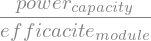

In [67]:
#If you print the python variable surface, its expression (function of lca_algebrauic parameters) is printed 
surface = power_capacity / efficacite_module
surface

In [68]:
#To get its value with default parameters value : 
agb.compute_value(surface)

[INFO] Required param 'efficacite_module' was missing, replacing by default value : 0.175
[INFO] Required param 'power_capacity' was missing, replacing by default value : 1500


In [69]:
#To get its value with chosen parameters value (if you do not put a parameter value, the default one will be used for the calculation) : 
agb.compute_value(
    surface,
    #power_capacity=1000,
    efficacite_module=0.2)

[INFO] Required param 'power_capacity' was missing, replacing by default value : 1500


# Activities

There are 3 main databases :

- The **biosphere database** that contains all the flows from and to the biosphere
- The **background reference database**: the modelised inventory is built with activities taken from the reference database for background. In this notebook, the reference database is ecoinvent.
- The **model database** : the modelised inventory is set up in the database 'USER_DB' that is independant of the reference database, so that the reference database is not modified.
  
In the following part, the terms "flow" and "activity" have the same meaning.

In [70]:
print('The databases that have been set up are :')
bw.databases

The databases that have been set up are :


Databases dictionary with 3 object(s):
	MyForeground
	biosphere3
	ecoinvent_v3.9.1_cutoff_ecoSpold02

## Activities in the Biosphere

In [71]:
# Define a biosphere flow 
water_in_air = agb.findBioAct("Water, in air") # update the right termonology to find the right activity and update the activity_name

# Print this activity with the function agb.printAct
agb.printAct(water_in_air)

Empty DataFrame
Columns: [(Water, in air (1.000000 cubic meter), input), (Water, in air (1.000000 cubic meter), amount), (Water, in air (1.000000 cubic meter), unit)]
Index: []

In [72]:
# Find activities in biosphere based on keyword with agb.findBioAct

# Warning 1: put "*" meaning it is not finished
# Warning 2 : the flow name starts with a Capital letter
# Warning 3 : let "single=False" so that the list is printed

agb.findBioAct("Water*", single=False)   

['Water' (cubic meter, None, ('water', 'surface water')),
 'Water' (cubic meter, None, ('water',)),
 'Water' (cubic meter, None, ('water', 'ocean')),
 'Water' (cubic meter, None, ('water', 'ground-')),
 'Water' (cubic meter, None, ('water', 'fossil well')),
 'Water' (cubic meter, None, ('water', 'ground-, long-term')),
 'Water' (cubic meter, None, ('air', 'non-urban air or from high stacks')),
 'Water' (cubic meter, None, ('air', 'low population density, long-term')),
 'Water' (cubic meter, None, ('air', 'lower stratosphere + upper troposphere')),
 'Water' (cubic meter, None, ('air',)),
 'Water' (cubic meter, None, ('air', 'urban air close to ground')),
 'Water, lake' (cubic meter, None, ('natural resource', 'in water')),
 'Water, river' (cubic meter, None, ('natural resource', 'in water')),
 'Fresh water (obsolete)' (cubic meter, None, ('water', 'surface water')),
 'Water, in air' (cubic meter, None, ('natural resource', 'in air')),
 'Salt water (obsolete)' (cubic meter, None, ('water

In [73]:
# Looking at the list printed above, pick the right name of the activity (update the name and delete "single = false")
# If there is no error, it means the activity is well identified
agb.findBioAct("Water, in air")

'Water, in air' (cubic meter, None, ('natural resource', 'in air'))

## Activities in the Technoshpere

In [74]:
## Find activities in technosphere based on keyword with agb.findTechAct

# Warning 1: put "*" meaning it is not finished
# Warning 2 : the flow name starts with a Capital letter
# Warning 3 : let "single=False" so that the list is printed

agb.findTechAct("photovoltaic mounting*",single=False)

In [75]:
bw.databases

Databases dictionary with 3 object(s):
	MyForeground
	biosphere3
	ecoinvent_v3.9.1_cutoff_ecoSpold02

In [76]:
# Warning : If there is more than one technosphere background database, use findActivity

steel= agb.findActivity('market for steel, low-alloyed',db_name='ecoinvent_v3.9.1_cutoff_ecoSpold02')
#aluminium=agb.findActivity('market for copper, cathode', db_name='ecoinvent-3.8-cutoff')

Exception: No activity found in 'ecoinvent_v3.9.1_cutoff_ecoSpold02' with name 'market for steel, low-alloyed' and location 'None'

In [ ]:
# Define a technosphere flow (update the right termonology to find the right activity and update the activity_name)
ground_mounting_system = agb.findTechAct('photovoltaic mounting system production, for 570kWp open ground module', 'GLO')
# if there are several activities in the database with the same name but not the same location, add the location - ex. agb.findTechAct('inverter production, 0.5kW','RER')

# Print this activity with the function agb.printAct(name_of_the_activity)
agb.printAct(ground_mounting_system)

In [ ]:
inverter = agb.findTechAct('inverter production, 0.5kW','RER')
pv_panel =agb.findTechAct("market for photovoltaic panel, multi-Si wafer")
agb.printAct(pv_panel)

## Creating a new activity

In [9]:
new_activity = agb.newActivity(
                    db_name=NAME_USER_DB,         # Database where the new activity is created
                    name="new activity name ",  # Activity name 
                    unit="unit",                # Unit
                    exchanges = {
                        ground_mounting_system :  1, #add flows and amount 
                        inverter:  2          #add flows and amount   
                        }
                    )
                               
agb.printAct(new_activity)

NameError: name 'ground_mounting_system' is not defined

## Modifying an existing activity

In [10]:
# If it is an activity from the reference database, 
# First copy the activity that will be modified with the function agb.copyActivity
# and to do all the modification in the user database
# otherwise you will modify ecoinvent database !

modified_mounting_system = agb.copyActivity(
    db_name=NAME_USER_DB,                            # Database where the new activity is copied
    activity = ground_mounting_system,                  # initial activity
    code = "mounting system adjusted")   # new name

#Print the copied activity that is for now not yet modified
agb.printAct(modified_mounting_system)

NameError: name 'ground_mounting_system' is not defined

There are 4 main ways of modifying an existing activity :

1. change the value of a flow of this activity (with another number or with a mathematic formula)
(*example : technology development enables to reduce a quantity of a material.*)

1. change a flow by another flow : the new flow is either another flow of the background database or a flow that has been specifically created.
(*example : if I want to change the electric mix by antoher one.*)

1. add a new flow
(*example : there is a new material used in a new technology.*)

1. delete an existing flow
(*example : if I have a photovoltaic installation on a roof (and not on the soil), I want to delete the concrete flow in the mounting system activity.*)

In [ ]:
# 1. change the value of a flow of this activity (with another number or with a mathematic formula) with the function updateExchanges
modified_mounting_system.updateExchanges({                   
   'zinc coat, coils' : 0.11 * on_ground,             
   'reinforcing steel' : 7.25*0.8})
     
# 2. change a flow by another flow with the function updateExchanges
other_concrete=agb.findTechAct('market for concrete, sole plate and foundation')
modified_mounting_system.updateExchanges({ 
    'concrete, normal' : other_concrete})      #'name of the modified flow' : name of the new flow

# 3. Add a new flow with the function addExchanges
steel_2= agb.findTechAct('market for steel, low-alloyed, hot rolled')
modified_mounting_system.addExchanges({
        steel_2: 7.25*0.2 })

# 4. Delete an existing flow with the function updateExchanges
modified_mounting_system.updateExchanges({                   
   'polyethylene, high density, granulate' : None})
     
# Print the differences between the original activity and the modified activity with the function agb.printAct
agb.printAct(ground_mounting_system, modified_mounting_system)

# Note : The modifications appear in YELLOW ! 
# Note : the mathematic formula with parameters are not calculated with default values > the mathematic formula are printed

## Switching activity / enum parameter

In [11]:
senegalese_elec_mix=agb.findTechAct('market for electricity, high voltage','SN')
french_elec_mix=agb.findTechAct('market for electricity, high voltage','FR')
german_elec_mix=agb.findTechAct('market for electricity, high voltage','DE')
italian_elec_mix=agb.findTechAct('market for electricity, high voltage','IT')
     
elec_mix = agb.newSwitchAct(
                    NAME_USER_DB, # Database where the new activity is created
                    "electricity mix",                                      
                    elec_mix_country, #enum parameter that is used to switch the activity
                            {
                                "senegal":senegalese_elec_mix,
                                "france": french_elec_mix,
                                 "germany": german_elec_mix,
                                 "italy": italian_elec_mix,
                            })

Exception: No activity found in 'ecoinvent_v3.9.1_cutoff_ecoSpold02' with name 'market for electricity, high voltage' and location 'SN'

# Inventory of the system

Gather all the activities of the system in an inventory (called "system") that will represent our whole system.

In [12]:
# Create a new activity for the full system with the function agb.newActivity
system = agb.newActivity(
                    db_name=NAME_USER_DB,                 # Database where we load the new activity
                    name="full system",  # System name 
                    unit="unit")                  # Unit

# If need, intermediate variables can be introduced
volume_steel_m3=0.03
mass_steel_kg=STEEL_DENSITY*volume_steel_m3

# Add new flows and corresponding quantity with the function addExchanges
system.addExchanges({
    modified_mounting_system : surface,
    pv_panel : surface,
    inverter: power_capacity/0.5,
    steel_2:mass_steel_kg,
    elec_mix:1000,
    
})

# Print the inventory of the modelised system
agb.printAct(system)

NameError: name 'STEEL_DENSITY' is not defined

# Impacts calculation

Most of the impacts calculations are performed with the functions `agb.compute_impacts´. If you need more information about a function, you can use  `?´ or help as shown below.

In [13]:
agb.compute_impacts?
help(agb.compute_impacts)

Help on function compute_impacts in module lca_algebraic.lca:

compute_impacts(models, methods, axis=None, functional_unit=1, return_params=False, description=None, **params)
    Main parametric LCIA method :
    Computes LCA by expressing the foreground model as symbolic expression of background activities and parameters.
    Then, compute 'static' inventory of the referenced background activities.
    This enables a very fast recomputation of LCA with different parameters,     useful for stochastic evaluation of parametrized model
    
    Parameters
    ----------
    models :
        Single model or
        List of model or
        List of (model, alpha)
        or Dict of model:amount
        In case of several models, you cannot use list of parameters
    
    methods :
        List of methods / impacts to consider
    
    axis:
        Designates the name of a custom attribute of foreground activities.
        You may set this attribute using the method `myActivity.updateMeta(y

Signature:
agb.compute_impacts(
    models,
    methods,
    axis=None,
    functional_unit=1,
    return_params=False,
    description=None,
    **params,
)
Docstring:
Main parametric LCIA method :
Computes LCA by expressing the foreground model as symbolic expression of background activities and parameters.
Then, compute 'static' inventory of the referenced background activities.
This enables a very fast recomputation of LCA with different parameters,     useful for stochastic evaluation of parametrized model

Parameters
----------
models :
    Single model or
    List of model or
    List of (model, alpha)
    or Dict of model:amount
    In case of several models, you cannot use list of parameters

methods :
    List of methods / impacts to consider

axis:
    Designates the name of a custom attribute of foreground activities.
    You may set this attribute using the method `myActivity.updateMeta(your_custom_attr="some_value")`

    The impacts will be ventilated by this attribute.


### Compute impacts of a sigle activity

In [14]:
# Calculate the impacts of the system modelised with the function agb.multiLCAAlgebric
# The calculation is done with the selected LCIA_methods for the selected impact categories

agb.compute_impacts(
    system,               # activity whose impacts are calculated
    impacts)              # list of selected impacts

# If there is no specific value for parameters, default values are automatically chosen

NameError: name 'impacts' is not defined

In [15]:
#You can also print in a second sheet : the default parameters value and chosen parameters value for the calculation 
agb.compute_impacts(
    system,               # activity whose impacts are calculated
    impacts,              # list of selected impacts    
    return_params=True)   # To create the second sheet with parameters value

NameError: name 'impacts' is not defined

### Compute impacts of several activities

In [16]:
agb.compute_impacts(
    [modified_mounting_system, inverter],         # list [] of activities
    impacts)                                      # list of selected impacts

# If there is no specific value for parameters, default values are automatically chosen

NameError: name 'modified_mounting_system' is not defined

### Compute the impacts of a specific set of parameters

In [17]:
# idem + specify parameters values 
agb.compute_impacts(
    system, 
    impacts,             
    power_capacity = 50,       # parameters value
    on_roof=0,                 # boolen parameters value 0 or 1
    elec_mix_country="italy",
    return_params=True,        # To create the second sheet with parameters value
    )     
# These functionalities only work woth lca_algebraic parameters and not with python variables !

NameError: name 'impacts' is not defined

### Compare several values of one parameter

In [ ]:
# idem + compare several values for one parameter
agb.compute_impacts(
    system, 
    impacts,             
    power_capacity = [50,100,200],
    #return_params=True,             # optional : To create the second sheet with parameters value
)  

### Compare several set of values of several parameter

In [ ]:
# idem + compare several values for 2 or more parameter
# Warning : either you put one value for a given parameter, either you put a list of parameters values that shall have the same length for each parameters

agb.compute_impacts(
    system, 
    impacts,             
    power_capacity = [50,100,200],
    on_roof=0,
    elec_mix_country=["italy","senegal","france"],
    #return_params=True,             # optional : To create the second sheet with parameters value

)   

# Functional unit

There are two options to modify the **functional unit**.

1. Create a new activity for the normalised system and calculate its impacts.
2. Use the `functional_unit` option in `agb.compute_impacts`

In [18]:
# Option 1
ystem_normalised_kWp = agb.newActivity(
   NAME_USER_DB,                  # Database where we load the new activity
   "impact per kWp installed",    # normalised system name
   "unit",                        # Unit 
    exchanges={system: 1 / power_capacity}) #divide the inventory of the system by the normalisation factor
     
agb.compute_impacts(
    system_normalised_kWp, 
    impacts,
)    

In [19]:
# Option 2
agb.compute_impacts(
    system, 
    impacts,
    functional_unit=power_capacity #The impacts of the mentionned activity will be divided by this amount
)

NameError: name 'impacts' is not defined

# Display

## Display impacts per sub-activity

In [20]:
#Displays all exchanges of one or several activities and their impacts.
#Warning, in this case, the first argument is the impact category and not the activity
agb.exploreImpacts(
    climate,                  #impact category 
    system,                   #name of the activity
    power_capacity = 1300     #optional : change the parameter value
    )

AttributeError: module 'lca_algebraic' has no attribute 'exploreImpacts'

## Axis functionnality

Divide your system in axis/subcategories to calculate the contribution of each subcategories to the impacts.

- You can add as much axis as you want and name them as you want.
- If the line _ other _ is not equal to zero, it means that you forgot to flag part of your modeled system.
- Warning! If you flag an inventory for a given axis (subsytem="pv panel"), you can not flag an inventory that uses this inventory with another for this given axis. Otherwise you will get an issue while computing the impacts.

In [21]:
#Axis : subsystem with two subcategories
BOP="balance of plant"
PV="PV panels"
#Axis: stage (life cycle stage) with two subcategories
MANUFACTURING = "phase 1 = manufacturing"
OPERATION = "phase 2 = operation and maintenance"

In [22]:
# Manufacturing stage

#When creating the activity, you flag the chosen axis (The axis can be named as you want)

#Activity to model the manufacturing of the balance of plant
balance_of_plant_manufacturing = agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="manufacturing of the balance of plant",   
                    unit="unit",            
                    subsystem=BOP,     #axis subsystem
                    stage=MANUFACTURING,#axis  stage
                    exchanges={
                        modified_mounting_system :  surface,  
                        inverter: power_capacity/0.5           
                        })

#Activity to model the manufacturing of pv panel
pv_panel_manufacturing=agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="manufacturing of the pv panel",   
                    unit="unit",           
                    subsystem=PV,        #axis subsystem
                    stage=MANUFACTURING,  #axis  stage
                    exchanges={
                        pv_panel:  surface, 
                        })

#Activity to model the manufacturing of the whole system
system_manufacturing=agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="manufacturing of the system",   
                    unit="unit",           
                    #no need to put the axis name as it is associated with the chosen acitivites as it is done for the subactivities
                    exchanges={
                        balance_of_plant_manufacturing: 1, 
                        pv_panel_manufacturing: 1, 
                        })

NameError: name 'modified_mounting_system' is not defined

In [23]:
# Operation and maintenance stage

#When creating the activity, you flag the chosen axis (The axis can be named as you want)

#Activity to model the operation and maintenance of the balance of plant
balance_of_plant_operation = agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="operation and maintenance of the balance of plant",   
                    unit="unit",          
                    subsystem=BOP,    #axis subsystem
                    stage=OPERATION,   #axis  stage
                    exchanges={
                        elec_mix :  1000
                        })

#Activity to model the operation and maintenance of pv panel
pv_panel_operation = agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="operation and maintenance of the pv panels",   
                    unit="unit",          
                    exchanges={
                        elec_mix :  5000
                        })

#If the activity is already created, you can add the flags as shown below. Do not forget to save !!
pv_panel_operation["subsystem"]=PV
pv_panel_operation.save()

pv_panel_operation["stage"]=OPERATION
pv_panel_operation.save()

#Activity to model the operation and maintenance of the whole system
system_operation=agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="operation and maintenance of the system",   
                    unit="unit",           
                    #no need to put the axis name as it is associated with the chosen acitivites
                    exchanges={
                        balance_of_plant_operation: 1, 
                        pv_panel_operation: 1, 
                        })

NameError: name 'elec_mix' is not defined

In [24]:
# Impacts of full system per axis

#Activity to model the whole system
system_full=agb.newActivity(
                    db_name=NAME_USER_DB,   
                    name="full system for axis function",   
                    unit="unit",           
                    exchanges={
                        system_manufacturing: 1, 
                        system_operation: 1, 
                        })
     
agb.compute_impacts(
    system_full,
    impacts,
    #functional_unit=power_capacity,
    #axis="subsystem",)
    axis="stage") 

# Export results in Excel

In [26]:
df = agb.compute_impacts(
    [system, modified_mounting_system],
    impacts,
    functional_unit=power_capacity)

df.to_excel("data/impact_test.xlsx")
df #To print it in Jupyter

NameError: name 'modified_mounting_system' is not defined